In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [ ]:
data = pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
print(data.info())
print(data.describe())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  1000

In [ ]:
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [ ]:
label_encoder = LabelEncoder()
data['Geography'] = label_encoder.fit_transform(data['Geography'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])

In [ ]:
X = data.drop(columns=['Exited'])
y = data['Exited']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
y_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]

In [ ]:
print("Logistic Regression Evaluation")
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Accuracy: {accuracy_log_reg}")
precision_log_reg = precision_score(y_test, y_pred_log_reg)
print(f"Precision: {precision_log_reg}")
recall_log_reg = recall_score(y_test, y_pred_log_reg)
print(f"Recall: {recall_log_reg}")
f1_log_reg = f1_score(y_test, y_pred_log_reg)
print(f"F1 Score: {f1_log_reg}")
roc_auc_log_reg = roc_auc_score(y_test, y_prob_log_reg)
print(f"ROC-AUC: {roc_auc_log_reg}")

Logistic Regression Evaluation
Accuracy: 0.815
Precision: 0.5966386554621849
Recall: 0.1806615776081425
F1 Score: 0.27734375
ROC-AUC: 0.763555120647422


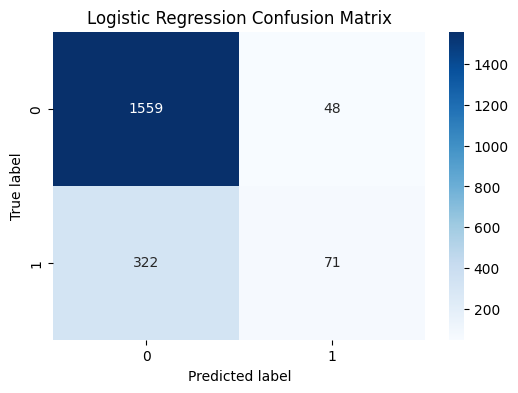

In [ ]:
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

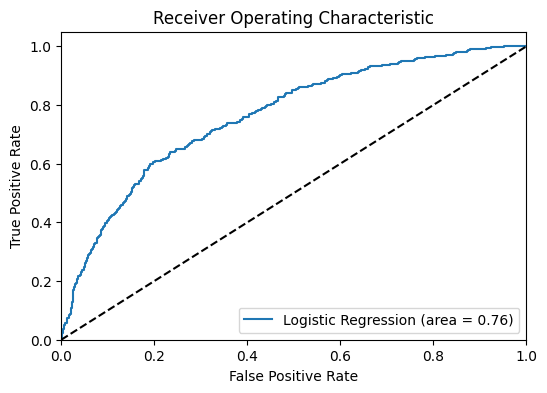

In [ ]:
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_prob_log_reg)
plt.figure(figsize=(6, 4))
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (area = {roc_auc_log_reg:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

In [ ]:
print("Random Forest Evaluation")
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf}")
precision_rf = precision_score(y_test, y_pred_rf)
print(f"Precision: {precision_rf}")
recall_rf = recall_score(y_test, y_pred_rf)
print(f"Recall: {recall_rf}")
f1_rf = f1_score(y_test, y_pred_rf)
print(f"F1 Score: {f1_rf}")
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
print(f"ROC-AUC: {roc_auc_rf}")

Random Forest Evaluation
Accuracy: 0.8645
Precision: 0.7479674796747967
Recall: 0.4681933842239186
F1 Score: 0.5758998435054773
ROC-AUC: 0.8566473649792337


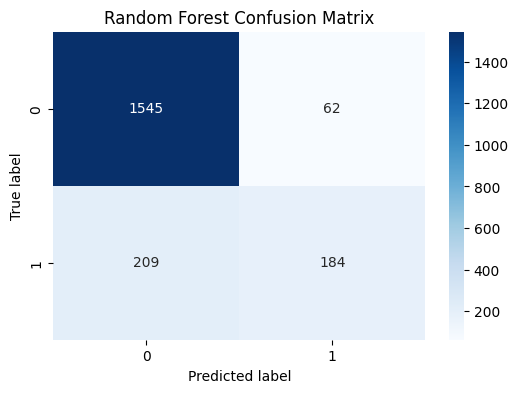

In [ ]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

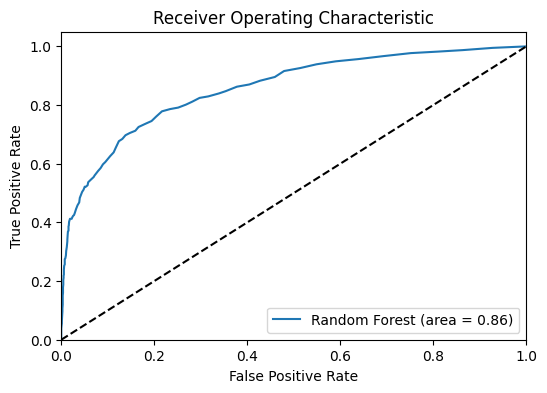

In [ ]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
y_prob_gb = gb_model.predict_proba(X_test)[:, 1]

In [ ]:
print("Gradient Boosting Evaluation")
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy: {accuracy_gb}")
precision_gb = precision_score(y_test, y_pred_gb)
print(f"Precision: {precision_gb}")
recall_gb = recall_score(y_test, y_pred_gb)
print(f"Recall: {recall_gb}")
f1_gb = f1_score(y_test, y_pred_gb)
print(f"F1 Score: {f1_gb}")
roc_auc_gb = roc_auc_score(y_test, y_prob_gb)
print(f"ROC-AUC: {roc_auc_gb}")

Gradient Boosting Evaluation
Accuracy: 0.8655
Precision: 0.7540983606557377
Recall: 0.4681933842239186
F1 Score: 0.5777080062794349
ROC-AUC: 0.8707467805450391


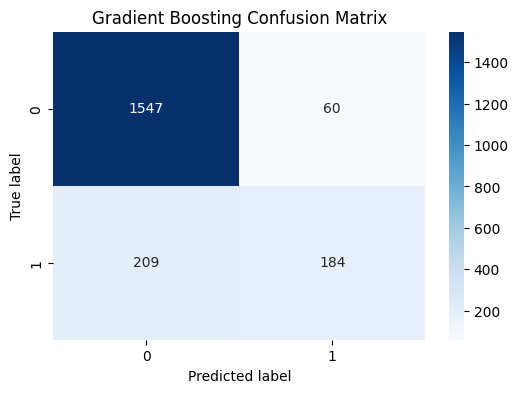

In [ ]:
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues')
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

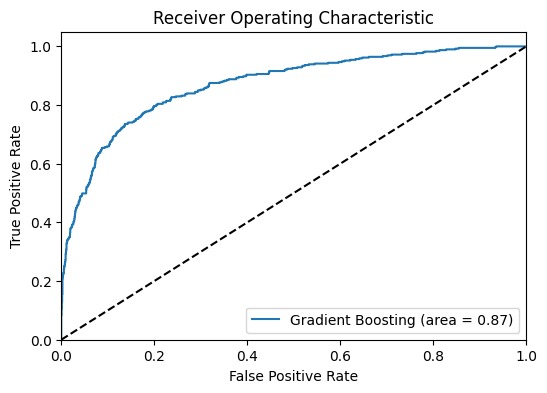

In [ ]:
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)
plt.figure(figsize=(6, 4))
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (area = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()